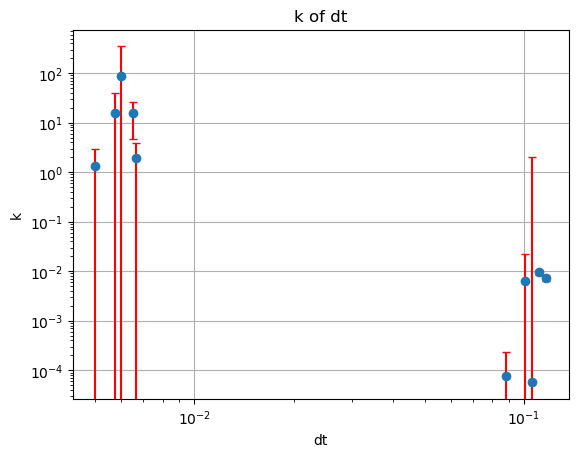

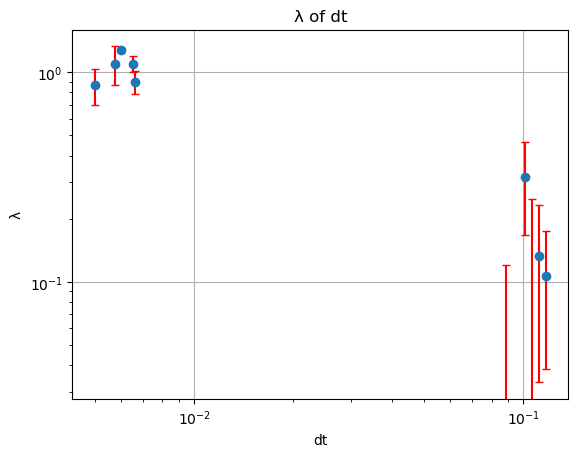

In [29]:
import numpy as np
import matplotlib.pyplot as plt

dt = np.array([5e-3, 5.73e-3, 6e-3, 6.63e-3, 6.5e-3, 8.82e-2, 1.011e-1, 1.058e-1, 1.1147e-1, 1.17e-1])
k = np.array([1.353, 16, 87.92, 1.959, 15.645, 7.546e-5, 6.343e-3, 5.709e-5, 9.425e-3, 7.142e-3])
dk = np.array([1.6, 24, 260, 2.0, 11, 1.6e-4, 1.6e-2, 2.0, 1.2e-3, 8.3e-4])
λ = np.array([8.643e-1, 1.098, 1.275, 8.999e-1, 1.095, -4.131e-5, 3.168e-1, -5.257e-2, 1.332e-1, 1.066e-1])
dλ = np.array([0.17, 0.23, 0.027, 0.11, 0.097, 0.12, 0.15, 0.3, 0.1, 0.068])

plt.errorbar(dt, k, yerr=dk, fmt='o', ecolor='red', capsize=3, label='k z niepewnościami')
plt.title(f"k of dt")
plt.xlabel("dt")
plt.ylabel("k")
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()


plt.errorbar(dt, λ, yerr=dλ, fmt='o', ecolor='red', capsize=3, label='λ z niepewnościami')
plt.title(f"λ of dt")
plt.xlabel("dt")
plt.ylabel("λ")
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

In [30]:
from scipy.stats import pearsonr

# Logarytmy danych (do korelacji log-log)
log_dt = np.log10(dt)
log_k = np.log10(k)
log_dk = dk / (k * np.log(10))  # przekształcenie niepewności k na niepewność log(k)

# Liczba prób bootstrapu
n_iter = 10000
r_values = []

# Losowanie z rozkładów normalnych wokół log_k z odchyleniem log_dk
rng = np.random.default_rng(seed=42)
for _ in range(n_iter):
    sampled_log_k = rng.normal(log_k, log_dk)
    r, _ = pearsonr(log_dt, sampled_log_k)
    r_values.append(r)

r_values = np.array(r_values)
mean_r = np.mean(r_values)
std_r = np.std(r_values)
ci_lower = np.percentile(r_values, 2.5)
ci_upper = np.percentile(r_values, 97.5)

mean_r, std_r, ci_lower, ci_upper

(np.float64(-0.0013270320272021224),
 np.float64(0.3364058695080072),
 np.float64(-0.3416433085542758),
 np.float64(0.33582545520562956))

In [27]:
from scipy.stats import pearsonr

r, p = pearsonr(dt, λ)
print(f"Współczynnik korelacji Pearsona: r = {r:.3f}, p = {p:.3g}")

Współczynnik korelacji Pearsona: r = -0.945, p = 3.62e-05


In [31]:
from scipy.stats import pearsonr

# Liczba prób bootstrapu
n_iter = 10000
r_values = []

# Losowanie z rozkładów normalnych wokół log_k z odchyleniem log_dk
rng = np.random.default_rng(seed=42)
for _ in range(n_iter):
    sampled_λ = rng.normal(λ, dλ)
    r, _ = pearsonr(dt, sampled_λ)
    r_values.append(r)

r_values = np.array(r_values)
mean_r = np.mean(r_values)
std_r = np.std(r_values)
ci_lower = np.percentile(r_values, 2.5)
ci_upper = np.percentile(r_values, 97.5)

mean_r, std_r, ci_lower, ci_upper

(np.float64(-0.9094407942061709),
 np.float64(0.035076839143339596),
 np.float64(-0.9637063742325865),
 np.float64(-0.8282493606676994))